In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

In [2]:
# Step 1:Generate a synthetic PPG signal
def generate_ppg_signal(fs=100, duration=10):
    t = np.linspace(0, duration, fs * duration)  # Time vector
    ppg_signal = 1.5 * np.sin(2 * np.pi * 1.2 * t)  # Simulated pulse wave
    ppg_signal += 0.5 * np.sin(2 * np.pi * 2.5 * t)  # Adding harmonic component
    ppg_signal += 0.2 * np.random.randn(len(t))  # Adding random noise
    return t, ppg_signal

In [3]:
# Step 2: Normalize the signal
def normalize_signal(signal):
    """
    Normalizes the signal to a range of [0, 1] using Min-Max Scaling.
    """
    return (signal - np.min(signal)) / (np.max(signal) - np.min(signal))

In [4]:
# Step 3: Bandpass filtering to remove noise
def bandpass_filter(data, fs=100, lowcut=0.5, highcut=5.0, order=3):
    nyquist = 0.5 * fs  # Nyquist frequency (half of the sampling rate)
    low = lowcut / nyquist  # Normalized low cutoff frequency
    high = highcut / nyquist  # Normalized high cutoff frequency
    b, a = butter(order, [low, high], btype='band')  # Design bandpass filter
    return filtfilt(b, a, data)  # Apply filter using zero-phase filtering

In [5]:
# Step 4: Peak Detection
def detect_peaks(ppg_signal, fs=100):
    peaks, _ = find_peaks(ppg_signal, distance=fs//2, prominence=0.2)  # Detect peaks
    return peaks

In [6]:
# Step 5: Feature Extraction
def extract_features(peaks, fs=100):
    rr_intervals = np.diff(peaks) / fs  # Compute R-R intervals (time between peaks)
    heart_rate = 60 / np.mean(rr_intervals) if len(rr_intervals) > 0 else 0  # Compute heart rate
    return heart_rate, rr_intervals

In [7]:
# Main execution
t, raw_ppg = generate_ppg_signal()  # Generate synthetic PPG signal
normalized_ppg = normalize_signal(raw_ppg)  # Normalize the signal
filtered_ppg = bandpass_filter(normalized_ppg)  # Apply bandpass filter
peaks = detect_peaks(filtered_ppg)  # Detect peaks
heart_rate, rr_intervals = extract_features(peaks)  # Extract heart rate and R-R intervals

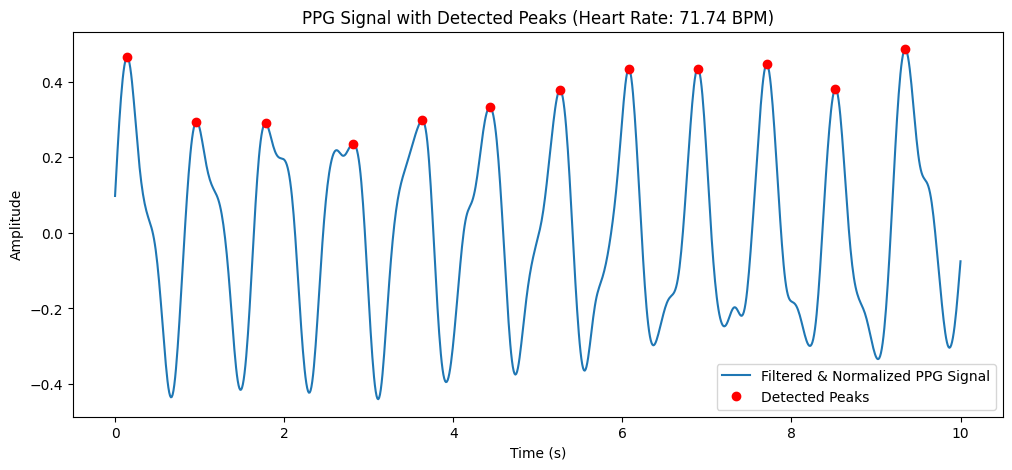

Estimated Heart Rate: 71.74 BPM


In [8]:
# Plot the results
plt.figure(figsize=(12, 5))
plt.plot(t, filtered_ppg, label='Filtered & Normalized PPG Signal')
plt.plot(t[peaks], filtered_ppg[peaks], 'ro', label='Detected Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'PPG Signal with Detected Peaks (Heart Rate: {heart_rate:.2f} BPM)')
plt.legend()
plt.show()

# Print estimated heart rate
print(f'Estimated Heart Rate: {heart_rate:.2f} BPM')

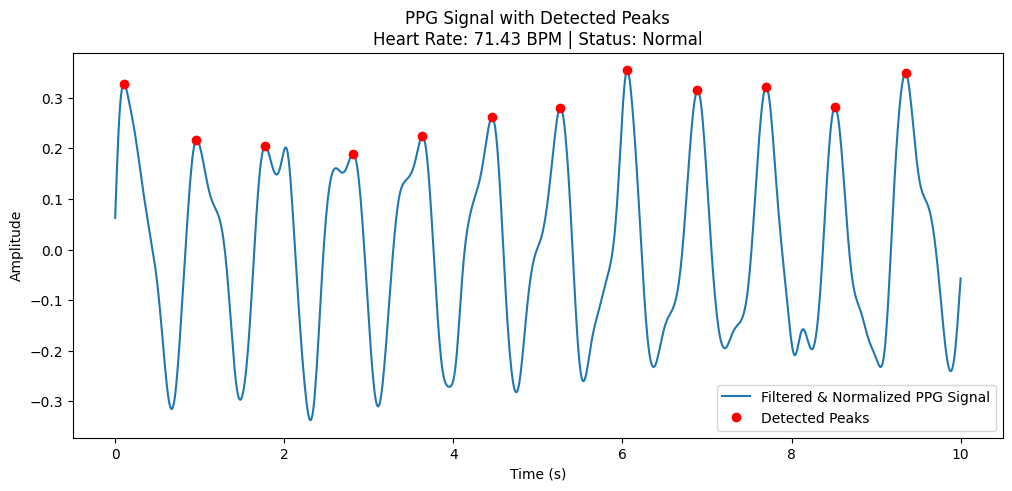

Estimated Heart Rate: 71.429 BPM
Condition: Normal


In [10]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# Step 1: Generate a synthetic PPG signal
def generate_ppg_signal(fs=100, duration=10, abnormal=False):
    """
    Generates a synthetic PPG signal with an option to introduce abnormalities.
    """
    t = np.linspace(0, duration, fs * duration)  # Time vector
    ppg_signal = 1.5 * np.sin(2 * np.pi * 1.2 * t)  # Normal PPG component
    ppg_signal += 0.5 * np.sin(2 * np.pi * 2.5 * t)  # Harmonic component
    ppg_signal += 0.2 * np.random.randn(len(t))  # Adding noise

    if abnormal:
        # Introduce irregular peaks (simulate arrhythmia)
        for i in range(2, len(t), fs * np.random.choice([1, 2, 3, 4])):  
            ppg_signal[i:i+3] += np.random.choice([-1.5, 1.5])  # Sudden spikes
        
    return t, ppg_signal

# Step 2: Normalize the signal
def normalize_signal(signal):
    """
    Normalizes the signal to a range of [0, 1] using Min-Max Scaling.
    """
    return (signal - np.min(signal)) / (np.max(signal) - np.min(signal))

# Step 3: Bandpass filtering to remove noise
def bandpass_filter(data, fs=100, lowcut=0.5, highcut=5.0, order=3):
    """
    Applies a bandpass Butterworth filter to the PPG signal.
    """
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# Step 4: Peak Detection
def detect_peaks(ppg_signal, fs=100):
    """
    Detects peaks in the filtered PPG signal corresponding to heartbeats.
    """
    peaks, _ = find_peaks(ppg_signal, distance=fs//2, prominence=0.2)
    return peaks

# Step 5: Feature Extraction & Abnormality Detection
def extract_features(peaks, fs=100):
    """
    Extracts heart rate and detects abnormalities.
    """
    if len(peaks) < 2:
        return 0, [], "No valid heartbeats detected"

    rr_intervals = np.diff(peaks) / fs  # Compute R-R intervals in seconds
    heart_rate = 60 / np.mean(rr_intervals) if len(rr_intervals) > 0 else 0

    # Detect abnormalities
    abnormality = "Normal"
    if heart_rate < 60:
        abnormality = "Bradycardia (Slow Heart Rate)"
    elif heart_rate > 100:
        abnormality = "Tachycardia (Fast Heart Rate)"
    
    # Check for arrhythmia (irregular heartbeats)
    if np.std(rr_intervals) > 0.2:  # If STD of RR intervals is high
        abnormality = "Arrhythmia (Irregular Heartbeat)"
    
    return heart_rate, rr_intervals, abnormality

# Main execution
t, raw_ppg = generate_ppg_signal(abnormal=True)  # Generate synthetic PPG with abnormalities
normalized_ppg = normalize_signal(raw_ppg)  # Normalize the signal
filtered_ppg = bandpass_filter(normalized_ppg)  # Apply bandpass filter
peaks = detect_peaks(filtered_ppg)  # Detect peaks
heart_rate, rr_intervals, abnormality = extract_features(peaks)  # Extract heart rate and detect abnormalities

# Plot the results
plt.figure(figsize=(12, 5))
plt.plot(t, filtered_ppg, label='Filtered & Normalized PPG Signal')
plt.plot(t[peaks], filtered_ppg[peaks], 'ro', label='Detected Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'PPG Signal with Detected Peaks\nHeart Rate: {heart_rate:.2f} BPM | Status: {abnormality}')
plt.legend()
plt.show()

# Print estimated heart rate and detected abnormality
print(f'Estimated Heart Rate: {heart_rate:.3f} BPM')
print(f'Condition: {abnormality}')
